In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
shanegerami_ai_vs_human_text_path = kagglehub.dataset_download('shanegerami/ai-vs-human-text')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-vs-human-text/AI_Human.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/kaggle/input/ai-vs-human-text/AI_Human.csv')

In [ ]:
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


# **Basic Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [ ]:
df.describe()

,generated
count,487235.000000
mean,0.372383
std,0.483440
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<Axes: xlabel='generated', ylabel='count'>

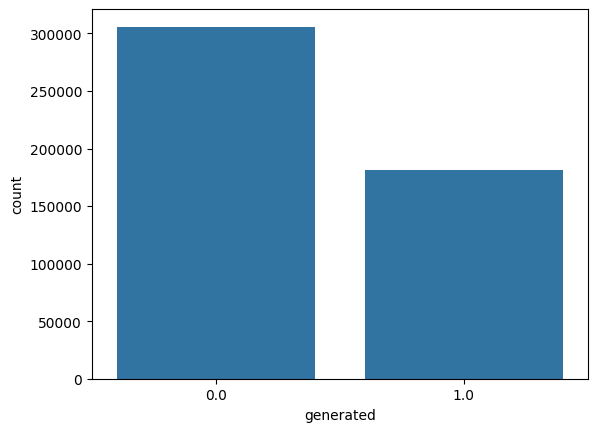

In [ ]:
sns.countplot(data=df,x='generated')

In [ ]:
print('Total Texts:', df['generated'].count())
print('Human Written Texts:', (df['generated'] == 0.0).sum())
print('AI Generated Texts:', (df['generated'] == 1.0).sum())


Total Texts: 487235
Human Written Texts: 305797
AI Generated Texts: 181438


# **Preprocessing**

In [ ]:
df['text'][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

In [ ]:
def remove_tags(text):
    tags = ['\n', '\'']
    for tag in tags:
        text = text.replace(tag, '')

    return text


df['text'] = df['text'].apply(remove_tags)


In [ ]:
df['text'][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.In like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article, "P

In [ ]:
import string

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punc(text):
    new_text = [x for x in text if x not in string.punctuation]
    new_text = ''.join(new_text)
    return new_text

df['text']=df['text'].apply(remove_punc)


In [ ]:
 df['text'][0]

'Cars Cars have been around since they became famous in the 1900s when Henry Ford created and built the first ModelT Cars have played a major role in our every day lives since then But now people are starting to question if limiting car usage would be a good thing To me limiting the use of cars might be a good thing to doIn like matter of this article In German Suburb Life Goes On Without Cars by Elizabeth Rosenthal states how automobiles are the linchpin of suburbs where middle class families from either Shanghai or Chicago tend to make their homes Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europeand up to 50 percent in some carintensive areas in the United States Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go Article Paris bans driving due to 

# **Spell Check**

In [ ]:
import nltk
from nltk.corpus import words

nltk.download('words')
english_words = set(words.words())


def is_spelled_correctly(word):
    return word in english_words

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
word_to_check = df['text'][487232]
if is_spelled_correctly(word_to_check):
    print(f"The word '{word_to_check}' is spelled correctly.")
else:
    print(f"The word '{word_to_check}' is spelled incorrectly.")

The word 'I firmly believe that governments worldwide should take immediate action to address the pressing issue of climate change as the consequences of inaction with be catastrophic for the planet and future generations There are several competing reasons that support my positionFirstly climate change poses a significant threat to our natural environment The earths temperature is rising at an alarming rate resulting in meeting ice caps rising sea Levels and an increase in extreme weather events such as hurricanes droughts and heatwaves These environmental changes have a devastating impact on ecosystems resulting in the Loss of biodiversity habitat destruction and species extinction For example the Great Barrier Reef one of the most biodiverse ecosystems on the planet has seen a significant decline in recent years due to coral bleaching caused by warming ocean temperaturesSecondly the negative impacts of climate change extend beyond environmental concerns affecting human health and ec

In [ ]:
df['text'][487232]

'I firmly believe that governments worldwide should take immediate action to address the pressing issue of climate change as the consequences of inaction with be catastrophic for the planet and future generations There are several competing reasons that support my positionFirstly climate change poses a significant threat to our natural environment The earths temperature is rising at an alarming rate resulting in meeting ice caps rising sea Levels and an increase in extreme weather events such as hurricanes droughts and heatwaves These environmental changes have a devastating impact on ecosystems resulting in the Loss of biodiversity habitat destruction and species extinction For example the Great Barrier Reef one of the most biodiverse ecosystems on the planet has seen a significant decline in recent years due to coral bleaching caused by warming ocean temperaturesSecondly the negative impacts of climate change extend beyond environmental concerns affecting human health and economic gr

In [ ]:
#import nltk
#from nltk.tok enize import word_tokenize, sent_tokenize
#from nltk.stem import PorterStemmer

#def correct_text(text):
 #   stemmer = PorterStemmer()
  #  english_words = set(words.words())
   # list_text = word_tokenize(text.lower())
    #stemmed_words = [stemmer.stem(word) for word in list_text]
    #for word in stemmed_words:
     #   if word not in english_words:
      #    return word

#correct_text(df['text'][0])


# **Stop Words Removal**

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download 'punkt' and 'stopwords' resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing punkt_tab data package

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text) # This now uses the downloaded punkt resource
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_words= ' '.join(filtered_words)
    return filtered_words

df['text']=df['text'].apply(remove_stopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df['text'][0]

'Cars Cars around since became famous 1900s Henry Ford created built first ModelT Cars played major role every day lives since people starting question limiting car usage would good thing limiting use cars might good thing doIn like matter article German Suburb Life Goes Without Cars Elizabeth Rosenthal states automobiles linchpin suburbs middle class families either Shanghai Chicago tend make homes Experts say huge impediment current efforts reduce greenhouse gas emissions tailpipe Passenger cars responsible 12 percent greenhouse gas emissions Europeand 50 percent carintensive areas United States Cars main reason greenhouse gas emissions lot people driving around time getting need go Article Paris bans driving due smog Robert Duffer says Paris days nearrecord pollution enforced partial driving ban clear air global city also says Monday motorist evennumbered license plates ordered leave cars home fined 22euro fine 31 order would applied oddnumbered plates following day Cars reason poll

# **Splitting the Dataset**

In [ ]:
y=df['generated']
X=df['text']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print(len(X_train))
print(len(y_train))

341064
341064


# **Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [ ]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),  # Step 1: CountVectorizer
    ('tfidf_transformer', TfidfTransformer()),  # Step 2: TF-IDF Transformer
    ('naive_bayes', MultinomialNB())])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_transformer', TfidfTransformer()),
                ('naive_bayes', MultinomialNB())])

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:
import joblib

# Save the trained pipeline (includes TF-IDF and classifier)
joblib.dump(pipeline, 'text_classifier_pipeline.pkl')

['text_classifier_pipeline.pkl']

In [ ]:
import joblib
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load the trained classifier
pipeline = joblib.load('text_classifier_pipeline.pkl')

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

# === Interactive Input ===
user_input = input("🔤 Enter the text to classify:\n")

preprocessed = preprocess(user_input)
prediction = pipeline.predict([preprocessed])[0]

# Output result
if prediction == 0:
    print("\n🧑 This text is classified as: Human-written")
else:
    print("\n🤖 This text is classified as: AI-generated")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


🔤 Enter the text to classify:
what are upto

🧑 This text is classified as: Human-written


In [ ]:
import numpy as np

def explain_prediction(pipeline, input_text):
    # Preprocess: lowercase, remove punctuation, etc.
    def preprocess(text):
        import re
        from nltk.corpus import stopwords
        from nltk.stem import WordNetLemmatizer
        import nltk
        nltk.download('stopwords', quiet=True)
        nltk.download('wordnet', quiet=True)

        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        stop_words = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()
        words = text.split()
        words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
        return " ".join(words)

    processed = preprocess(input_text)

    # Vectorize the input
    vectorizer = pipeline.named_steps['count_vectorizer']
    tfidf = pipeline.named_steps['tfidf_transformer']
    clf = pipeline.named_steps['naive_bayes']

    X_counts = vectorizer.transform([processed])
    X_tfidf = tfidf.transform(X_counts)
    proba = clf.predict_proba(X_tfidf)[0]
    pred_class = clf.predict(X_tfidf)[0]

    # Get feature names and coefficients
    feature_names = vectorizer.get_feature_names_out()
    word_weights = clf.feature_log_prob_[int(pred_class)]

    # Map input words to their influence (if they exist in vocab)
    word_scores = {}
    input_words = processed.split()

    for word in input_words:
        if word in feature_names:
            idx = np.where(feature_names == word)[0][0]
            word_scores[word] = word_weights[idx]

    # Sort by importance
    top_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]

    # Print results
    label = "🧑 Human-written" if pred_class == 0 else "🤖 AI-generated"
    confidence = round(np.max(proba) * 100, 2)

    print(f"\n🔍 Prediction: {label}")
    print(f"✅ Confidence: {confidence}%")
    print("💡 Top influential words:")

    for word, score in top_words:
        print(f"  - {word} (importance: {round(score, 2)})")

In [ ]:
\text = input("Enter a sentence: ")
explain_prediction(pipeline, text)

Enter a sentence: hi what are you upto

🔍 Prediction: 🧑 Human-written
✅ Confidence: 83.14%
💡 Top influential words:
  - hi (importance: -10.21)
  - upto (importance: -12.88)


# **Evaluation of Results**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     91597
         1.0       0.98      0.89      0.94     54574

    accuracy                           0.95    146171
   macro avg       0.96      0.94      0.95    146171
weighted avg       0.96      0.95      0.95    146171



In [ ]:
import joblib

# Save the pipeline (replace 'model' with 'pipeline')
joblib.dump(pipeline, 'final_model.pkl')

# Access and save the tfidf vectorizer from the pipeline
tfidf_vectorizer = pipeline.named_steps['tfidf_transformer']
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [ ]:
'''# app.py
%%writefile app.py

import streamlit as st
import joblib
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load NLTK stuff
nltk.download('stopwords')
nltk.download('wordnet')

# Load model
pipeline = joblib.load('text_classifier_pipeline.pkl')

# Define same preprocessing used in notebook
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

# Streamlit app UI
st.title("🧠 Human vs AI Text Classifier")

text_input = st.text_area("Enter the text you want to check:")

if st.button("Classify"):
    preprocessed = preprocess(text_input)
    prediction = pipeline.predict([preprocessed])[0]

    if prediction == 0:
        st.success("🧑 This text is classified as: **Human-written**")
    else:
        st.warning("🤖 This text is classified as: **AI-generated**")'''

'# app.py\n%%writefile app.py\n\nimport streamlit as st\nimport joblib\nimport re\nimport nltk\nfrom nltk.corpus import stopwords\nfrom nltk.stem import WordNetLemmatizer\n\n# Load NLTK stuff\nnltk.download(\'stopwords\')\nnltk.download(\'wordnet\')\n\n# Load model\npipeline = joblib.load(\'text_classifier_pipeline.pkl\')\n\n# Define same preprocessing used in notebook\ndef preprocess(text):\n    text = text.lower()\n    text = re.sub(r\'[^\\w\\s]\', \'\', text)\n    stop_words = set(stopwords.words(\'english\'))\n    lemmatizer = WordNetLemmatizer()\n    words = text.split()\n    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]\n    return " ".join(words)\n\n# Streamlit app UI\nst.title("🧠 Human vs AI Text Classifier")\n\ntext_input = st.text_area("Enter the text you want to check:")\n\nif st.button("Classify"):\n    preprocessed = preprocess(text_input)\n    prediction = pipeline.predict([preprocessed])[0]\n\n    if prediction == 0:\n        st.success("🧑 This 

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load trained model
pipeline = joblib.load('text_classifier_pipeline.pkl')

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

# Explanation function
def explain_prediction(pipeline, input_text):
    processed = preprocess(input_text)

    # Extract parts of the pipeline
    vectorizer = pipeline.named_steps['count_vectorizer']
    tfidf = pipeline.named_steps['tfidf_transformer']
    clf = pipeline.named_steps['naive_bayes']

    # Transform input
    X_counts = vectorizer.transform([processed])
    X_tfidf = tfidf.transform(X_counts)
    proba = clf.predict_proba(X_tfidf)[0]
    pred_class = clf.predict(X_tfidf)[0]

    # Get top influencing words
    feature_names = vectorizer.get_feature_names_out()
    word_weights = clf.feature_log_prob_[int(pred_class)]
    word_scores = {}
    input_words = processed.split()

    for word in input_words:
        if word in feature_names:
            idx = np.where(feature_names == word)[0][0]
            word_scores[word] = word_weights[idx]

    top_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    return pred_class, proba, top_words

# Streamlit UI
st.title("🧠 Human vs AI Text Classifier with Confidence & Explanation")

text_input = st.text_area("📝 Enter your text below:")

if st.button("🔍 Classify"):
    if not text_input.strip():
        st.warning("Please enter some text to analyze.")
    else:
        pred_class, proba, top_words = explain_prediction(pipeline, text_input)
        confidence = round(np.max(proba) * 100, 2)

        # Show prediction
        if pred_class == 0:
            st.success(f"🧑 This text is classified as **Human-written**")
        else:
            st.warning(f"🤖 This text is classified as **AI-generated**")

        # Show confidence
        st.markdown(f"### 🔎 Confidence: `{confidence}%`")
        st.progress(confidence / 100)

        # Show top words
        st.markdown("### 💬 Top Influential Words:")
        for word, score in top_words:
            st.markdown(f"- `{word}` (importance: {round(score, 2)})")

Overwriting app.py


In [ ]:
!pip install streamlit
!pip install pyngrok

In [ ]:
from pyngrok import ngrok

# Paste your actual token below
ngrok.set_auth_token("2vabjR3ISBSZGmnopjxOpk0Wflz_3AvBnsaaRc7YfufxkLRXt")

In [ ]:
from pyngrok import ngrok

# Disconnect all existing tunnels (if any)
for tunnel in ngrok.get_tunnels():
    ngrok.disconnect(tunnel.public_url)
    print(f"Disconnected: {tunnel.public_url}")

# Connect the new tunnel
public_url = ngrok.connect(8501)
print("🚀 Your app is live at:", public_url)

Disconnected: https://e9a4-34-169-98-66.ngrok-free.app
🚀 Your app is live at: NgrokTunnel: "https://8bb9-34-169-98-66.ngrok-free.app" -> "http://localhost:8501"


**FIN**

toehiruwjqklms;a,.';

**bold text**

In [ ]:
!streamlit run app.py &> /dev/null &
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("🚀 Your app is live at:", public_url)

🚀 Your app is live at: NgrokTunnel: "https://6e1f-34-169-98-66.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
from pyngrok import ngrok
import time

# Disconnect all existing tunnels (if any)
# First, try killing the ngrok process to force termination
ngrok.kill()

# Reset the ngrok process and ensure all sessions are closed
ngrok.set_auth_token("2vabjR3ISBSZGmnopjxOpk0Wflz_3AvBnsaaRc7YfufxkLRXt")

# Get a list of tunnels to see if it cleared
tunnels = ngrok.get_tunnels()
print(f"Active tunnels: {tunnels}")

for tunnel in tunnels:
    ngrok.disconnect(tunnel.public_url)
    print(f"Disconnected: {tunnel.public_url}")

# Paste your actual token below
ngrok.set_auth_token("2vabjR3ISBSZGmnopjxOpk0Wflz_3AvBnsaaRc7YfufxkLRXt")  # Or try different authentication token if you have multiple accounts

# Explicitly using bind_tls to specify the tunnel type
public_url = ngrok.connect(8501, bind_tls=True)  # Replace with False for HTTP tunnels if needed

print("🚀 Your app is live at:", public_url)

# Launch the app
!streamlit run app.py &> /dev/null &

# Wait a few seconds for it to spin up
time.sleep(5)

Active tunnels: []
🚀 Your app is live at: NgrokTunnel: "https://0aee-34-148-124-217.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (only once)
nltk.download('stopwords')
nltk.download('wordnet')

# Load the trained model pipeline
pipeline = joblib.load('text_classifier_pipeline.pkl')

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

# Explain prediction with confidence + top influential words
def explain_prediction(pipeline, input_text):
    processed = preprocess(input_text)

    vectorizer = pipeline.named_steps['count_vectorizer']
    tfidf = pipeline.named_steps['tfidf_transformer']
    clf = pipeline.named_steps['naive_bayes']

    X_counts = vectorizer.transform([processed])
    X_tfidf = tfidf.transform(X_counts)

    proba = clf.predict_proba(X_tfidf)[0]
    pred_class = clf.predict(X_tfidf)[0]

    feature_names = vectorizer.get_feature_names_out()

    # Map predicted class label to class index
    class_idx = np.where(clf.classes_ == pred_class)[0][0]
    log_probs = clf.feature_log_prob_[class_idx]

    feature_names = vectorizer.get_feature_names_out()
    log_probs = clf.feature_log_prob_[pred_class]  # log prob for predicted class
    input_words = processed.split()

    word_scores = {}
    for word in input_words:
        if word in feature_names:
            idx = np.where(feature_names == word)[0][0]
            word_scores[word] = log_probs[idx]

    # Get top 5 influential words (based on log prob weight)
    top_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]

    return pred_class, np.max(proba), top_words

# ─────────────────────────────── UI ───────────────────────────────

st.set_page_config(page_title="AI vs Human Classifier", layout="centered", page_icon="🧠")

st.title("🧠 Human vs AI Text Classifier")
st.markdown("Enter any sentence or paragraph below, and the model will tell you whether it was written by a human or generated by AI.")

text_input = st.text_area("✍️ Enter your text here:", height=150)

if st.button("🔍 Classify"):
    if not text_input.strip():
        st.warning("⚠️ Please enter some text to classify.")
    else:
        pred_class, confidence, top_words = explain_prediction(pipeline, text_input)

        if pred_class == 0:
            st.success("🧑 This text is classified as: **Human-written**")
        else:
            st.warning("🤖 This text is classified as: **AI-generated**")

        # Show confidence
        st.markdown(f"### 📊 Confidence Level: `{round(confidence * 100, 2)}%`")
        st.progress(confidence)

        # Influential words
        st.markdown("### 💡 Top Influential Words:")
        if top_words:
            for word, score in top_words:
                st.markdown(f"- **`{word}`** — weight: `{round(score, 2)}`")
        else:
            st.info("No influential words found — possibly too short or filtered out.")

Overwriting app.py


FIN
